# Lecture 7

## Interpolation

We have up until now focussed solely on how to solve equations using finite difference stencils and mesh functions evaluated on a regular (uniform) mesh. For example, in 1D a mesh function is

$$
u_{i} = u(x_i), \quad i \in (0, 1, \ldots, N_x)
$$

where $x_i = i \Delta x$. In 2D a mesh function is

$$
u_{ij} = u(x_i, y_j), \quad (i, j) \in (0, 1, \ldots, N_x) \times (0, 1, \ldots, N_y)
$$

where $y_j = j \Delta y$. We have also looked at a problem that is 1D in space, plus time. In this case the mesh function is

$$
u^n_{i} = u(t_n, x_i), \quad (n, i) \in (0, 1, \ldots, N_t) \times (0, 1, \ldots, N_x)
$$

where $t_n = n \Delta t$. Later in this lecture we will look at the wave equation in 2D space plus time. In this case the mesh function will be

$$
u^{n}_{ij} = u(t_n, x_i, y_j) \quad \quad (n, i, j) \in (0, 1, \ldots, N_t) \times (0, 1, \ldots, N_x) \times (0, 1, \ldots, N_y)
$$

Up until now we have learned how to compute these mesh functions, but we have not really talked about how to use them. A natural question is what if you need to know the solution at a specific point and time $u(t, x, y)$? And this point is not a mesh point? How do you compute this number from the mesh function?

The answer is interpolation.

### One-dimensional interpolation

Interpolation is most easily understood using a one-dimensional example. Assume that the mesh is $\Omega \in [0, 1]$ and

$$
u(x) = x(1-x)
$$(eq-u)

Let us create a mesh using $N=5$ and the mesh function corresponding to {eq}`eq-u`. Let us also plot the mesh functions as blue dots.


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt 

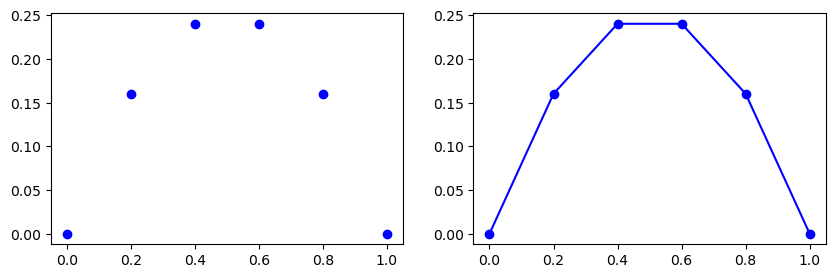

In [2]:
N = 5
xj = np.linspace(0, 1, N+1)
u = xj*(1-xj)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
ax0.plot(xj, u, 'bo')
ax1.plot(xj, u, 'bo-');

In the figure above to the left the mesh function $U=(u_i)_{i=0}^N$ is represented with the blue dots. In the figure to the right linear profiles have been added by matplotlib in between the points because we ask for it using `bo-`. The linear profiles represent linear *interpolation*, which is a first order approach to computing the mesh function in between the mesh points. The next figure compares the linear interpolation to the exact solution.

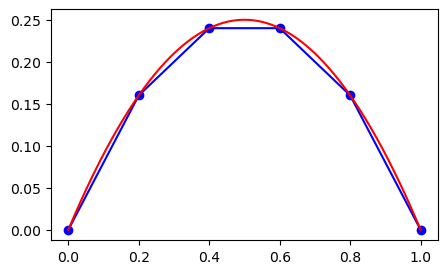

In [3]:
fig = plt.figure(figsize=(5, 3))
plt.plot(xj, u, 'bo-')
xl = np.linspace(0, 1, 1000)
plt.plot(xl, xl*(1-xl), 'r-');

Note that even though the mesh function here is exact at all the mesh points, the linear interpolation between points is far from being accurate.

We now want to compute $u(0.75)$ using linear interpolation. We get this from drawing a straight line from $u(x_3=0.6) = 0.24$ to $u(x_4=0.8)=0.16$, and this line can be represented as

$$
\overline{u}(x) = u_3 + \frac{u_4-u_3}{\Delta x}\frac{x-x_3}{x_4-x_3}
$$

By inserting for $u_3, u_4, x_3$ and $x_4$ we get

$$
\overline{u}(x) = 0.24 -0.4(x-0.6)
$$

We can create this profile using Sympy 

In [4]:
x = sp.Symbol('x')
uo = u[3] + (u[4]-u[3])/(xj[4]-xj[3])*(x-xj[3])
uo

0.48 - 0.4*x

And we can plot the linearly interpolated point $u(0.75)$ as a green dot

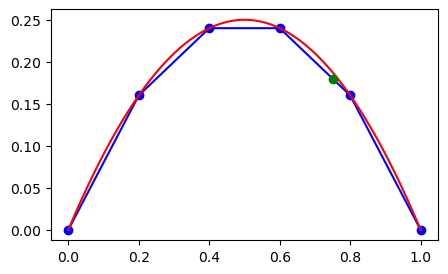

In [5]:
fig = plt.figure(figsize=(5, 3))
plt.plot(xj, u, 'bo-')
xl = np.linspace(0, 1, 1000)
plt.plot(xl, xl*(1-xl), 'r-')
plt.plot(0.75, uo.subs(x, 0.75), 'go');

The interpolation curve that we have created using Sympy can be used for any point, but it makes most sense to use it between $x_3$ and $x_4$. If we use it outside this domain, the accuracy is much worse, and we also refer to this as *extrapolation*.

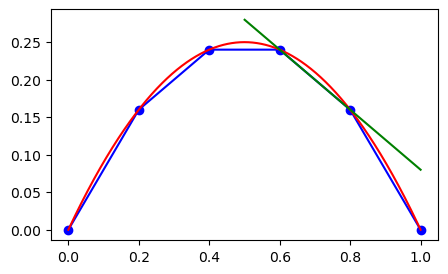

In [6]:
fig = plt.figure(figsize=(5, 3))
plt.plot(xj, u, 'bo-')
xl = np.linspace(0, 1, 1000)
plt.plot(xl, xl*(1-xl), 'r-')
plt.plot(xl[500:], sp.lambdify(x, uo)(xl[500:]), 'g-');

## Lagrange interpolation polynomials

Linear interpolation is easy to understand and easy to compute with. However, it is not very accurate. And why would you want to waste your hard earned second-order accurate mesh function (or exact, as above) using only first order accurate interpolation? You shouldn't and there is no need to. Linear interpolation makes use of only 2 interpolation points. Higher order interpolation simply makes use of more points. The most straight-forward way to do this is through the use of [Lagrange interpolation polynomials](https://en.wikipedia.org/wiki/Lagrange_polynomial). 

A Lagrange interpolation polynomial makes use of $k+1$ nodes $(x^0, x^1, \ldots, x^k)$. These are not usually identical to the entire computational mesh, but rather the closest points to the point of interest. Like for the linear interpolation above, the points would simply be $(x^0, x^1) = (x_3, x_4)$. To separate the Lagrange points from the mesh points we will simply use superscript on the Lagrange points. So here the superscript does not mean the power!

With Lagrange interpolation we make use of the Lagrange basis functions (or cardinal functions)

$$
    \ell_j(x) = \frac{x-x^0}{x^j-x^0} \cdots \frac{x-x^{j-1}}{x^j-x^{j-1}}\frac{x-x^{j+1}}{x^j-x^{j+1}} \cdots \frac{x-x^{k}}{x^j-x^{k}}
$$

which can be more compactly written as

$$
\ell_j(x) = \prod_{0 \ge m \ge k \\ m \ne j} \frac{x-x^m}{x^j-x^m}
$$

The Lagrange interpolating polynomial is then

$$
L(x) = \sum_{j=0}^k u^j \ell_j(x)
$$

where $u^j$ are the mesh function values at the chosen mesh points. Note that for the linear interpolation example, we would use the two neighbouring values $(u^0, u^1) = (u_3, u_4)$.

```{note}
Note that all Lagrange basis functions are such that on the chosen mesh points $(x^{i})_{i=0}^{k}$ we have 

$$
\ell_j(x^i) = \delta_{ij} = \begin{cases} 1 \text{ for } i=j \\
0 \text{ for }  i\ne j
\end{cases}
$$
```

The first order Lagrange polynomial is exactly the one we have already computed. Lets evaluate it as in the formula above by first computing the basis functions

$$
\ell_0(x) = \frac{x-x^1}{x^0-x^1} \quad \text{and} \quad
\ell_1(x) = \frac{x-x^0}{x^1-x^0}
$$

```{note}
The Lagrange basis functions do not depend on the mesh function values, only on the mesh points. Also note that the mesh points do not need to be uniform, any mesh will do as long as $x^{j+1}>x^j$ and all points are different, i.e., $x^k \ne x^j$ for $k \ne j$
```

The Lagrange polynomial is then

$$
L(x) = u^0 \ell_0(x) + u^1 \ell_1(x)
$$

Inserting for $u^0=0.24, u^1=0.16, x^0=0.6$ and $x^1=0.8$ we get

$$
L(x) = 0.24\frac{x-0.8}{0.6-0.8} + 0.16 \frac{x-0.6}{0.8-0.6}
$$

which can be rearranged into

$$
L(x) = 0.48-0.4x
$$

which is the same as the linear interpolation we have already computed before.

```{note}
Higher order interpolation simply makes use of more neighbouring points. 
```

Let us now implement these Lagrange polynomials using Sympy. We create two functions, where `Lagrangebasis` returns the basis functions $(\ell_j)_{j=0}^k$ and `Lagrangefunction` returns the complete Lagrange function: 

In [7]:
def Lagrangebasis(X, x=x):
    """Construct Lagrange basis function for points in X
    
    Parameters
    ----------
    X : array
        Interpolation points
    x : Sympy Symbol
    
    Returns
    -------
    Lagrange basis functions
    """
    from sympy.core import Mul
    n = len(X)
    coeffs = []
    numert = Mul(*[x - X[i] for i in range(n)])

    for i in range(n):
        numer = numert/(x - X[i])
        denom = Mul(*[(X[i] - X[j]) for j in range(n) if i != j])
        coeffs.append(numer/denom)
    return coeffs

def Lagrangefunction(u, basis):
    """Return Lagrange polynomial
    
    Parameters
    ----------
    u : array
        Mesh function values
    basis : tuple of Lagrange basis functions
        Output from Lagrangebasis
    """
    f = 0
    for j, uj in enumerate(u):
        f += basis[j]*uj
    return f

Now check that these functions work by creating the linear interpolator

In [8]:
ll = Lagrangebasis(xj[3:5])
L = Lagrangefunction(u[3:5], ll)
L

0.48 - 0.4*x

Works!

Naturally, the Sympy function can be evaluated for a single point

In [9]:
L.subs(x, 0.65)

0.220000000000000

or for an array of points

In [10]:
sp.lambdify(x, L)(np.array([0.5, 0.6, 0.7]))

array([0.28, 0.24, 0.2 ])

## Two-dimensional interpolation

We now consider the 2D problem where we have the mesh function

$$
u_{ij} = u(x_i, y_j)
$$

and want to evaluate this mesh function for some point inside the domain that is not a mesh point. We now need to interpolate in two dimensions. To get started we need a 2D mesh and an appropriate mesh function to interpolate. We will use the 2D function

$$
u(x, y) = x(1-x)y(1-y)
$$

and a domain $\Omega = [0, 1]^2$. 

```{note}
It is common to write $[a, b]^2$ for the Cartesian product of a set with itself. So $[0, 1]^2 = [0, 1] \times [0, 1]$
```

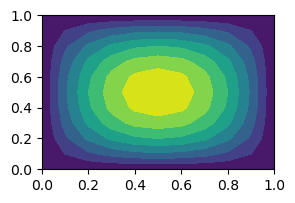

In [11]:
def mesh2D(Nx, Ny, Lx, Ly, sparse=False):
    x = np.linspace(0, Lx, Nx+1)
    y = np.linspace(0, Ly, Ny+1)
    return np.meshgrid(x, y, indexing='ij', sparse=sparse)

N = 10
xij, yij = mesh2D(N, N, 1, 1, False)
u2 = xij*(1-xij)*yij*(1-yij)
plt.figure(figsize=(3, 2))
plt.contourf(xij, yij, u2);

We want to find $u(0.55, 0.65)$ from the mesh function $U=(u_{ij})_{i,j=0}^{N, N}$.

There are several procedures for performing 2D interpolation. We will choose the Lagrange interpolation first and use $k+1$ points in both $x$ and $y$ directions. In this case the Lagrange interpolating polynomial will be

$$
L(x, y) = \sum_{m=0}^k\sum_{n=0}^k u^{m,n} \ell_{m}(x) \ell_{n}(y)
$$(eq-Lagrange)

where $u^{m,n}$ are the mesh function values for the points we choose for the interpolation, that should be the points closest to the interpolated point. For our case with $N=10$ this would be the four points $(u_{ij})_{i=5, j=6}^{6, 7}$. Using only these four points we will achieve linear interpolation in both $x$ and $y$-direction. 

The four interpolation points are shown as blue dots in the figure below, and the point we are trying to evaluate is shown as a red dot

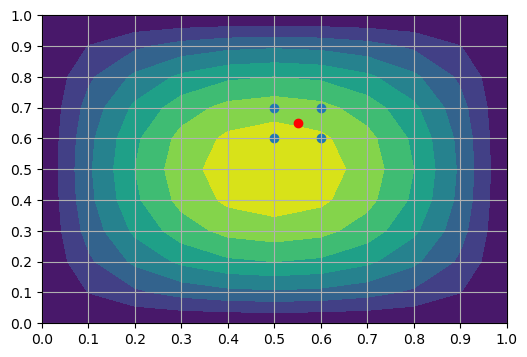

In [12]:
plt.figure(figsize=(6, 4))
plt.contourf(xij, yij, u2)
plt.scatter(xij[5:7, 6:8], yij[5:7, 6:8])
plt.plot(np.array([0.55]), np.array([0.65]), 'ro')
plt.xticks(xij[:, 0])
plt.yticks(xij[:, 0])
plt.grid()

The Lagrange basis functions $\ell_m(x)$ and $\ell_n(y)$ are computed exactly as before, only now with $\ell_m(x)$ using points along the $x$-direction (for linear $(x^0, x^1)=(x_5, x_6))$ whereas $\ell_n(y)$ are using points along the $y$-direction (for linear $(y^0, y^1)=(y_6, y_7)$). Naturally, we can choose more points if we want more than linear interpolation.

We can reuse the previously defined function `Lagrangebasis`, since both $\ell_m(x)$ and $\ell_n(y)$ are one-dimensional functions. This was the reason why we gave `Lagrangebasis` a keyword argument `x=x`, because now we can compute $\ell_n(y)$ using a Symbol `y` as shown below:

In [13]:
y = sp.Symbol('y')
lx = Lagrangebasis(xij[5:7, 0], x=x)
ly = Lagrangebasis(yij[0, 6:8], x=y)

We need a new function for the 2D Lagrange polynomial though, since this is a double loop

In [14]:
def Lagrangefunction2D(u, basisx, basisy):
    N, M = u.shape
    f = 0
    for i in range(N):
        for j in range(M):
            f += basisx[i]*basisy[j]*u[i, j]
    return f

`Lagrangefunction2D` should return a Lagrange function like {eq}`eq-Lagrange`.

We can now test the function by first creating it

In [15]:
f = Lagrangefunction2D(u2[5:7, 6:8], lx, ly)
sp.simplify(f)

0.0300000000000011*x*y - 0.0419999999999998*x - 0.0900000000000003*y + 0.126

and then checking that it works

In [16]:
ue = x*(1-x)*y*(1-y)
print(f.subs({x: 0.55, y: 0.65}), ue.subs({x: 0.55, y: 0.65}))

0.0551250000000000 0.0563062500000000


The results are not identical because this is merely a first order interpolation. With one additional point using $(x_5, x_6, x_7)$ and $(y_5, y_6, y_7)$ we get

In [17]:
lx = Lagrangebasis(xij[5:8, 0], x=x)
ly = Lagrangebasis(yij[0, 5:8], x=y)
f = Lagrangefunction2D(u2[5:8, 5:8], lx, ly)
print(f.subs({x: 0.55, y: 0.65}), ue.subs({x: 0.55, y: 0.65}))

0.0563062500000000 0.0563062500000000


These two results are now identical since the polynomials are second order.

### Other tools for interpolation

There are also other tools in Numpy and Scipy that can help you do 2D interpolation with minimal effort. Most of them are based on splines, which is not a topic in this class, but still useful to know about. We can do interpolation with simple, one-line calls, as follows

In [18]:
from scipy.interpolate import interpn
print(interpn((xij[5:8, 0], yij[0, 5:8]), u2[5:8, 5:8], np.array([0.55, 0.65])))

[0.055125]


Here we get the same result as linear above even though we use 3 points in each direction. This is because `interpn` is using `linear` interpolation by default. Modify this to `cubic` (which requires 4 points in each direction) to obtain better accuracy

In [19]:
print(interpn((xij[5:9, 0], yij[0, 5:9]), u2[5:9, 5:9], np.array([0.55, 0.65]), method='cubic'))

[0.05630625]


## Errors and integration

For the numerical solution $u$ and the exact solution $u^{e}$ the $L^2$ error norm can in general, for any domain $\Omega$ and number of dimensions, be defined as

$$
\|u-u^{e}\|_{L^2} = \sqrt{\int_{\Omega} (u-u^{e})^2 d\Omega}
$$

In 2D $\Omega = [0, L_x] \times [0, L_y]$ and the integral becomes

$$
\|u-u^{e}\|_{L^2} = \sqrt{\int_{0}^{L_x}\int_0^{L_y}(u-u^{e})^2 dy dx}
$$

Hence we need to be able to compute such double integrals. One approach is the midpoint rule computed for any integrand $u(x, y)$ as follows

$$
\int_{0}^{L_x}\int_0^{L_y}u(x,y) dy dx = \sum_{i=0}^{N_x-1} \sum_{j=0}^{N_y-1} u((i+0.5)\Delta x, (j+0.5) \Delta y) \Delta x \Delta y
$$

This integral requires the value of the function $u$ in the middle of all the computational cells, where the cells are defined as all the squares in the figure below. In order to compute the value of  $u$ in the center of all cells, we need to interpolate. Linear interpolation will in this case lead to an average of $u$ in the four surrounding nodes, marked with blue dots in the figure for $u(2.5 \Delta x, 1.5 \Delta y)$.

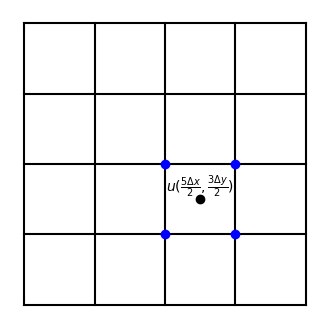

In [20]:
fig = plt.figure(figsize=(4, 4))
N = 5
for i in range(N):
    plt.plot((0, N-1), (i, i), 'k')
for j in range(N):
    plt.plot((j, j), (0, N-1), 'k')
ax = fig.gca()
ax.axis('off')
ax.axis('equal')
plt.plot(2.5, 1.5, 'ko')
plt.plot(2, 1, 'bo')
plt.plot(2, 2, 'bo')
plt.plot(3, 1, 'bo')
plt.plot(3, 2, 'bo')
plt.text(2.5, 1.6, r"$u(\frac{5\Delta x}{2}, \frac{3\Delta y}{2})$", horizontalalignment='center');

We can compute values of $u$ in all the cell centers easily using vectorization. For the field `u2` defined above with shape $(N_x+1)\times (N_y+1)$ we get 

In [21]:
um = (u2[:-1, :-1]+u2[1:, :-1]+u2[:-1, 1:]+u2[1:, 1:])/4

Note that `um` is a matrix of shape $N_x \times N_y$.
The integral required for the $L^2$-norm can now be computed easily and we get the following function for the $L^2$ error

In [22]:
def L2_error(u, ue, dx, dy):
    u = u-ue # Compute the difference in all nodes 
    um = (u[:-1, :-1]+u[1:, :-1]+u[:-1, 1:]+u[1:, 1:])/4
    return np.sqrt(np.sum(um*dx*dy))

Just like for the 1D case there is a simplification using the small $\ell^2$ norm instead

$$
\|(u-u_e)\|_{\ell^2} = \sqrt{ \Delta x \Delta y \sum_{i=0}^{N_x}\sum_{j=0}^{N_y} (u_{ij}-u^{e}_{ij})^2 }
$$

The result will be very similar to the $L^2$-norm for most mesh functions. Note how the sums are from 0 to $N_x$ and $N_y$ above, since these are sums over nodes and not cell centers. The $l^2$ error is very easy to implement:

In [ ]:
def l2_error(u, ue, dx, dy):
    return np.sqrt(dx*dy*np.sum((u-ue)**2))


## The wave equation in 2D plus time

We will now consider the wave equation

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u
$$

in a two-dimensional spatial domain $\Omega = [0, L_x] \times [0, L_y]$ and in time $t \in [0, T]$. The problem will be solved with Dirichlet boundary conditions $u=0$ on the entire boundary, and it will also require an initial condition $u(0, x, y) = I(x, y)$ and an initial derivative, here set to zero $\frac{\partial u}{\partial t}(0, x, y) = 0$.

Perhaps surprisingly, this equation is considerably easier to implement than the Poisson equation, because of the hyperbolic nature of the problem. Hyperbolic problems are often solved with recursive methods that simply step the solution forward in time, and do as such not require setting up and solving matrix equations. However, we can still use much of the theory described in lecture 6, about the 2D mesh and 2D discretised equations. 

```{note}
Time-dependent equations like the wave-equation (hyperbolic) are usually easy to implement, but the numerical scheme needs to consider stability as the solution is moved forward in time. Steady-state equations like the Poisson equation (elliptic) are usually more difficult to set up, but stability is then usually not an issue because we are not stepping the solution anywhere (unless we try to solve the problem iteratively). 
```

### Mesh function

The computational mesh is the same as in lecture 6, with the domain

$$
\Omega = \boldsymbol{x} \times \boldsymbol{y}
$$

where $\boldsymbol{x} = (x_i)_{i=0}^{N_x}$, $\boldsymbol{y} = (y_j)_{j=0}^{N_y}$,

$$
x_i = i \Delta x, \quad i = 0, 1, \ldots, N_x
$$

$$
y_j = j \Delta y, \quad j = 0, 1, \ldots, N_y
$$

and $\Delta x = L_x/N_x$ and $\Delta y = L_y/N_y$.

Time will also use uniform intervals, and $t_n = n \Delta t$ for $n=0, 1, \ldots, N_t$. A function $u(t, x, y)$ evaluated on this mesh is now found as

$$
u^{n}_{ij} = u(t_n, x_i, y_j)
$$

However, we will only store the solution at three consecutive time steps, just like for the 1D wave problem. We will as such make use of the three mesh functions

$$
U^{n+1} = (u^{n+1}_{ij})_{i,j=0}^{N_x, N_y} \quad U^{n} = (u^{n}_{ij})_{i,j=0}^{N_x, N_y} \quad U^{n-1} = (u^{n-1}_{ij})_{i,j=0}^{N_x, N_y}
$$

that all are matrices of shape $(N_x+1) \times (N_y+1)$.

We will solve the wave equation using central difference in time as well as in space. A discretization of all internal points is thus

$$
\frac{u^{n+1}_{i,j} - 2u^n_{i,j} + u^{n-1}_{i-1, j}}{\Delta t^2} =
 c^2 \left(\frac{u^n_{i+1,j} - 2u^n_{i,j} + u^n_{i-1, j}}{\Delta x^2} + \frac{u^n_{i,j+1} - 2u^n_{i,j} + u^n_{i, j-1}}{\Delta y^2}\right)
$$

On matrix form this equation reads

$$
\frac{U^{n+1}-2U^n+U^{n-1}}{\Delta t^2} = c^2 \left( D^{(2)}_x U^n + U^n (D^{(2)}_y)^T \right)
$$

A solution algorithm is thus to

   1. Specify $U^0$ and $U^1$ from initial conditions
   2. for n in (1, 2, ..., $N_t-1$) compute
       * $U^{n+1} = 2U^n - U^{n-1} + (c\Delta t)^2 \left( D^{(2)}_x U^n + U^n (D^{(2)}_y)^T \right)$ 
       * Apply boundary conditions to $U^{n+1}$
       * Swap $U^{n-1} \leftarrow U^n$ and $U^n \leftarrow U^{n+1}$

Other than that we can simply reuse a lot of code from lecture 6. A function for the second derivative matrix is:

In [23]:
import numpy as np
import scipy.sparse as sparse

def D2(N):
    D = sparse.diags([1, -2, 1], [-1, 0, 1], (N+1, N+1), 'lil')
    D[0, :4] = 2, -5, 4, -1
    D[-1, -4:] = -1, 4, -5, 2
    return D

A function `mesh2D` for creating the 2D mesh has already been described in this notebook. We are thus ready to create a solver that steps the solution forward in time. For simplicity we will use $N_x=N_y=N$ and $L_x=L_y=L$

In [24]:
def solver(N, L, Nt, cfl=0.5, c=1, store_data=10):
    xij, yij = mesh2D(N, N, L, L)
    Unp1, Un, Unm1 = np.zeros((3, N+1, N+1))
    Un[:] = np.exp(-40*((xij-0.6)**2 + (yij-0.5)**2))
    Unm1[:] = Un
    dx = L / N
    D = D2(N)/dx**2
    dt = cfl*dx/c
    plotdata = {0: Unm1.copy()}
    for n in range(1, Nt):
        Unp1[:] = 2*Un - Unm1 + (c*dt)**2*(D @ Un + Un @ D.T)
        # Set boundary conditions
        Unp1[0] = 0
        Unp1[-1] = 0
        Unp1[:, -1] = 0
        Unp1[:, 0] = 0
        # Swap solutions
        Unm1[:] = Un
        Un[:] = Unp1
        if n % store_data == 0:
            plotdata[n] = Unm1.copy() # Unm1 is now swapped to Un
    return xij, yij, plotdata

Note that boundary conditions can be set after stepping the solution forward in time. Hence it does not really matter what is done to the solution at boundaries when `Unp1` is computed, because the boundary will be modified later. This is very different from when we solve the Poisson equation and it is possible because of the recursive (explicit) solution algorithm. Note that the unknown `Unp1` is not part of the right hand side in the update

$$
U^{n+1} = 2U^n - U^{n-1} + (c\Delta t)^2 \left( D^{(2)}_x U^n + U^n (D^{(2)}_y)^T \right)
$$

A vectorized algorithm for this problem is possible, and it would read

$$
\text{vec}(U^{n+1}) = 2 \text{vec}(U^n) - \text{vec}(U^{n-1}) + (c\Delta t)^2 \left( D^{(2)}_x \otimes I_y + I_x \otimes D^{(2)}_y \right) \text{vec}(U^n)
$$

However, this approach is not necessary, since we use a recursive solution algorithm that simply updates $U^{n+1}$. Note that if we were to write this vectorized equation as `Ax=b`, then `A` would simply be equal to the identity matrix and `b` would be equal to the entire right hand side above. Since `A` is the identity matrix, the problem is already solved. For the Poisson equation it is different because `A` equals $D^{(2)}_x \otimes I_y + I_x \otimes D^{(2)}_y$. As stated initially, the hyperbolic nature of the wave equation makes it significantly easier to solve than the elliptic Poisson equation.

We are now ready to solve the wave equation for a chosen mesh size and we also choose to store the solution every fifth time step.

In [25]:
xij, yij, data = solver(40, 1, 200, cfl=0.5, store_data=5)

Plot the initial data

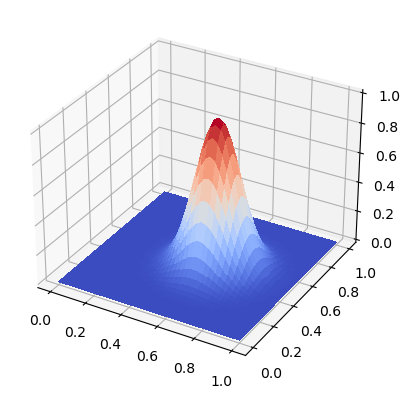

In [26]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xij, yij, data[0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

Create an animation for the solution using matplotlib.

In [27]:
%%capture 
# capture, otherwise there will be a plot in this cell
import matplotlib.animation as animation

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
frames = []
for n, val in data.items():
    frame = ax.plot_wireframe(xij, yij, val, rstride=2, cstride=2);
    #frame = ax.plot_surface(xij, yij, val, vmin=-0.5*data[0].max(), 
    #                        vmax=data[0].max(), cmap=cm.coolwarm,
    #                        linewidth=0, antialiased=False)
    frames.append([frame])
    
ani = animation.ArtistAnimation(fig, frames, interval=400, blit=True,
                                repeat_delay=1000)
ani.save('wavemovie2d.apng', writer='pillow', fps=5) # This animated png opens in a browser

In [28]:
from IPython.display import HTML
from IPython.display import display
display(HTML(ani.to_jshtml()))

Note that the CFL number $C = c \Delta t / \Delta x$ here needs to be smaller than $1/\sqrt{2}$ in order to get a stable solution. This number follows from the two-dimensional nature of the problem where the wave can spread out in two dimensions. Try to solve the problem above with CFL=1 and it should blow up.

Note that there is usually one CFL number for each direction in a two-dimensional problem:

$$
C_x = \frac{c \Delta t}{\Delta x} \quad \text{and} \quad C_y = \frac{c \Delta t}{\Delta y}
$$

and for the current problem you need (see Eq. (2.97) in the [PDE book](https://link.springer.com/book/10.1007/978-3-319-55456-3))

$$
C_x^2 + C_y^2 \le 1
$$

which for $\Delta x = \Delta y$ leads to $\frac{c \Delta t}{ \Delta x} \le \frac{1}{\sqrt{2}}$.